In [1]:
import numpy
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("bogus_student_data.txt", delimiter=" ")

In [3]:
df

,exercise_points,exam_points,grades
0,8.25,31.39,2.0
1,16.03,40.00,5.0
2,10.00,32.58,3.0
3,7.89,26.88,1.0
4,10.29,38.31,4.0
...,...,...,...
1995,12.34,32.91,3.0
1996,17.12,40.00,5.0
1997,12.05,35.67,3.0
1998,11.04,39.81,4.0


In [4]:
df["grades"].value_counts()

4.0    487
3.0    432
2.0    376
5.0    334
1.0    232
0.0    139
Name: grades, dtype: int64

Visualize the distribution of the final grades

(array([139.,   0., 232.,   0., 376.,   0., 432.,   0., 487., 334.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

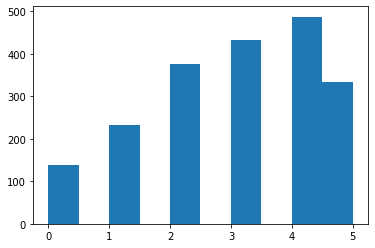

In [5]:
plt.hist(df['grades'])

Visualize the connection between exercises done and points earned in the exam

<AxesSubplot:xlabel='exercise_points', ylabel='exam_points'>

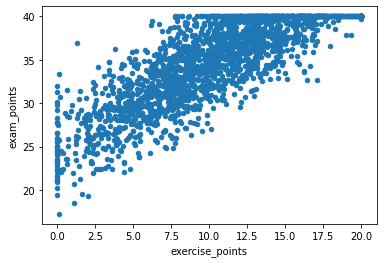

In [6]:

df.plot.scatter(x = 'exercise_points', y = 'exam_points')

Compute means and std's of exercise points over all observations.

In [7]:
print(f"Mean: {df['exercise_points'].mean()}")
print(f"Std: {df['exercise_points'].std()}")

Mean: 10.10813
Std: 4.660824932093439


Compute means and std's of exercise points of grade 0

In [8]:
##Loc grades 0
df2 =  df.loc[df['grades'] == 0]
print(f"Mean: {df2['exercise_points'].mean()}")
print(f"Std: {df2['exercise_points'].std()}")

Mean: 1.8310791366906474
Std: 1.5230907224339811


Compute means and std's of exercise points of grade 1

In [9]:
##Loc grades 1
df3 =  df.loc[df['grades'] == 1]
print(f"Mean: {df3['exercise_points'].mean()}")
print(f"Std: {df3['exercise_points'].std()}")

Mean: 4.599181034482759
Std: 1.7134471272828147


Compute means and std's of exercise points of grade 2

In [10]:
##Loc grades 2
df4 =  df.loc[df['grades'] == 2]
print(f"Mean: {df4['exercise_points'].mean()}")
print(f"Std: {df4['exercise_points'].std()}")

Mean: 7.3363297872340425
Std: 1.5585142797817695


Compute means and std's of exercise points of grade 3

In [11]:
##Loc grades 3
df5 =  df.loc[df['grades'] == 3]
print(f"Mean: {df5['exercise_points'].mean()}")
print(f"Std: {df5['exercise_points'].std()}")

Mean: 10.006388888888889
Std: 1.6489615424867112


Compute means and std's of exercise points of grade 4

In [12]:
##Loc grades 4
df6 =  df.loc[df['grades'] == 4]
print(f"Mean: {df6['exercise_points'].mean()}")
print(f"Std: {df6['exercise_points'].std()}")

Mean: 12.685030800821357
Std: 1.6420916442711593


Compute means and std's of exercise points of grade 5

In [13]:
##Loc grades 5
df7 =  df.loc[df['grades'] == 5]
print(f"Mean: {df7['exercise_points'].mean()}")
print(f"Std: {df7['exercise_points'].std()}")

Mean: 16.87395209580838
Std: 1.7783813398398245


<AxesSubplot:xlabel='exercise_points', ylabel='grades'>

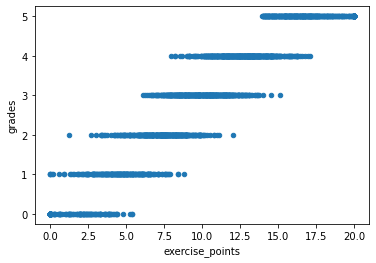

In [14]:

df.plot.scatter(x = 'exercise_points', y = 'grades')

C:\Users\riina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


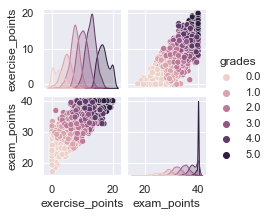

In [16]:

import seaborn as sns; sns.set()
sns.pairplot(df, hue='grades', size=1.5);


Can you reliably tell if student is going to get grade 5 or grade 0 by looking at the amount of
done exercise alone?
- No i cant

But I can say that if student gets 

Clean up data

In [17]:
df.dtypes

exercise_points    float64
exam_points        float64
grades             float64
dtype: object

In [18]:
df['grades'] = df['grades'].astype(str)

In [19]:
df.dtypes

exercise_points    float64
exam_points        float64
grades              object
dtype: object

Dataframe to exercise points and grades only

In [67]:
df_exc = df[["exercise_points", "grades"]]

In [68]:
df_exc

,exercise_points,grades
0,8.25,2.0
1,16.03,5.0
2,10.00,3.0
3,7.89,1.0
4,10.29,4.0
...,...,...
1995,12.34,3.0
1996,17.12,5.0
1997,12.05,3.0
1998,11.04,4.0


Dataframe to exam points and grades only

In [70]:
df_exa = df[["exam_points", "grades"]]

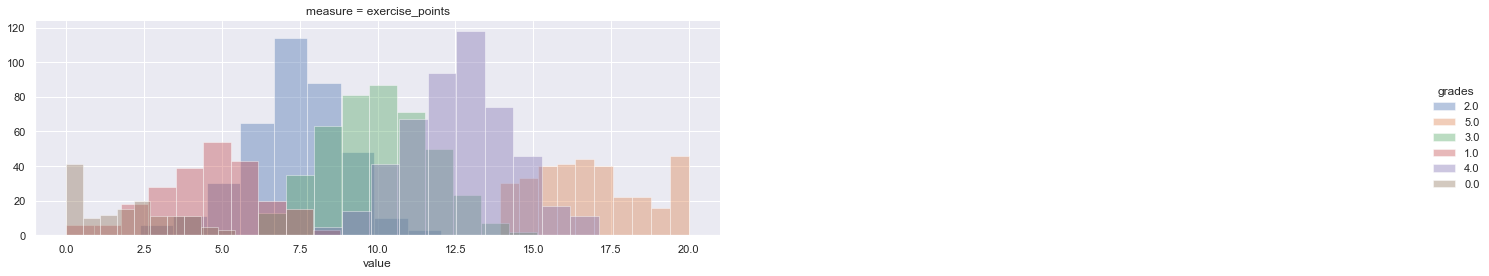

In [69]:
df_long = pd.melt(df_exc[df_exc.columns], "grades", var_name="measure")
g = sns.FacetGrid(df_long, hue="grades", col="measure", col_wrap=2, sharex=False, height=4, aspect=2.5)
g.map(plt.hist, "value", alpha=.4)
g.add_legend()

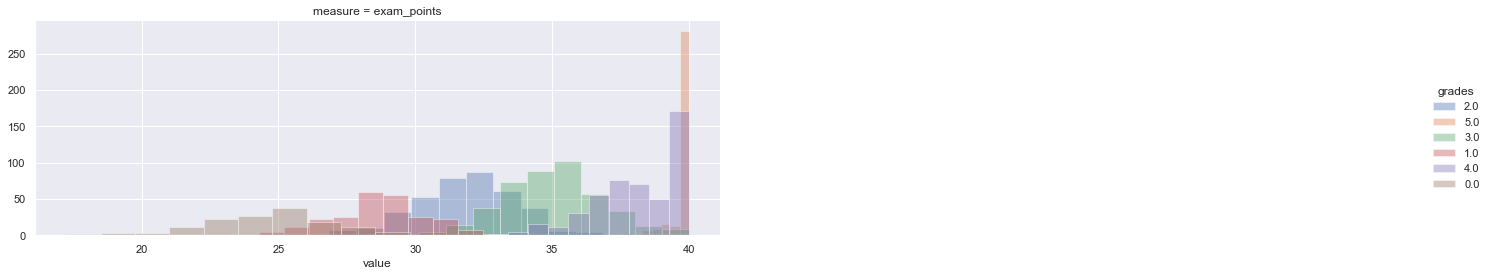

In [72]:
df_long2 = pd.melt(df_exa[df_exa.columns], "grades", var_name="measure")
g = sns.FacetGrid(df_long2, hue="grades", col="measure", col_wrap=2, sharex=False, height=4, aspect=2.5)
g.map(plt.hist, "value", alpha=.4)
g.add_legend()

In [20]:
from sklearn.model_selection import train_test_split

In [39]:
cols_data = ['exercise_points', 'exam_points']
cols_class = ['grades']

x_grades = df.loc[:, cols_data]
y_grades = df.loc[:, cols_class]

In [40]:
print("Absolute counts" + '\n' + '-' *30)
print(y_grades['grades'].value_counts())

print('\n Relative sizes (%)' + '\n' + '-'*30)
print(100 * y_grades['grades'].value_counts() / y_grades.shape[0])

Absolute counts
------------------------------
4.0    487
3.0    432
2.0    376
5.0    334
1.0    232
0.0    139
Name: grades, dtype: int64

 Relative sizes (%)
------------------------------
4.0    24.35
3.0    21.60
2.0    18.80
5.0    16.70
1.0    11.60
0.0     6.95
Name: grades, dtype: float64


Classifier: Decision stump
- Split dataset into training and testing

In [41]:
from sklearn.model_selection import train_test_split

x_grades_tr, x_grades_te, y_grades_tr, y_grades_te = train_test_split(x_grades, y_grades, train_size = 0.75)

In [42]:
print('Training data')
print(x_grades_tr.shape)
print(y_grades_tr.shape)

print('')
print('Testing data')
print(x_grades_te.shape)
print(y_grades_te.shape)

Training data
(1500, 2)
(1500, 1)

Testing data
(500, 2)
(500, 1)


In [43]:
def add_labels(df, labels):
  df = df.copy()
  df['labels'] = labels
  return df

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

def get_accuracy(dataset_name, y_pred, y_te):
  """Get the prediction accuracy."""
  print('-'*30)
  print(f'Results for {dataset_name}')
  print('-'*30)
  
  print(f'\nClass distribution (percent)')
  print('-'*30)
  n_tot = y_te.shape[0]
  cd = 100 * y_te.value_counts() / n_tot
  print(cd)
  
  print(f'\nAccuracy = {accuracy_score(y_te, y_pred):.2f}')
  print('-'*30)
  
  print('\nConfusion matrix (rows are true values and columns are predicted values)')
  print('-'*30)
  print(confusion_matrix(y_te, y_pred))
  print('')
  
def train_and_evaluate_model(model, dataset_name, X_tr, y_tr, X_te, y_te):
    """Train and evaluate a model."""
    model.fit(X_tr, y_tr.values.ravel())
    y_pred = model.predict(X_te)
    get_accuracy(dataset_name, y_pred, y_te)
    return model

In [45]:
features = x_grades_tr.columns

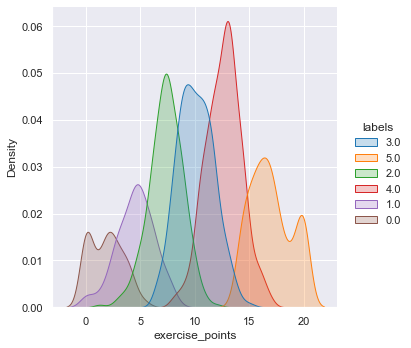

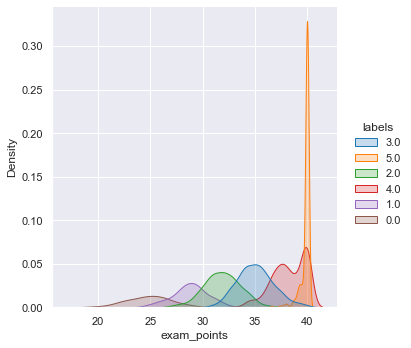

In [47]:
for feature in features:
    ax = sns.displot(add_labels(x_grades_tr, y_grades_tr), x = feature, kind = 'kde', hue = 'labels', palette = 'tab10', fill = True)

Train the classifier

In [76]:
from sklearn import tree
c_dstump_grades = tree.DecisionTreeClassifier(max_depth=2)
c_dstump_grades.fit(x_grades_tr, y_grades_tr)

DecisionTreeClassifier(max_depth=2)

Visualize the decision stump

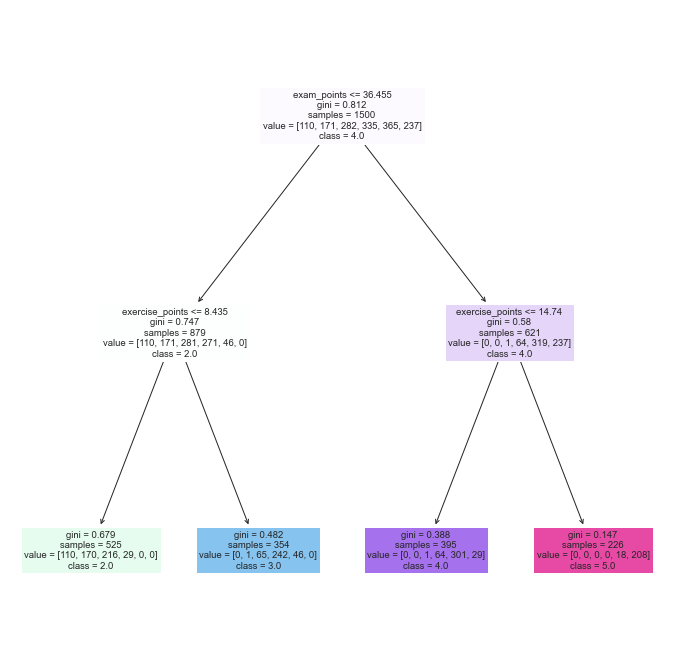

In [77]:
plt.figure(figsize =(12,12))
_ = tree.plot_tree(c_dstump_grades, filled = True, feature_names = x_grades_tr.columns, class_names = c_dstump_grades.classes_)

In [74]:
y_grades_pred = c_dstump_grades.predict(x_grades_te)

In [75]:
  print('-'*30)
  print(f'Results for grades - decision stump')
  print('-'*30)
  
  print(f'\nClass distribution (percent)')
  print('-'*30)
  n_tot = y_grades_te.shape[0]
  cd = 100 * y_grades_te.value_counts() / n_tot
  print(cd)
  
  print(f'\nAccuracy = {accuracy_score(y_grades_te, y_grades_pred):.2f}')
  print('-'*30)
  
  print('\nConfusion matrix (rows are true values and columns are predicted values)')
  print('-'*30)
  print(confusion_matrix(y_grades_te, y_grades_pred))
  print('')

------------------------------
Results for grades - decision stump
------------------------------

Class distribution (percent)
------------------------------
grades
4.0       24.4
3.0       19.4
5.0       19.4
2.0       18.8
1.0       12.2
0.0        5.8
dtype: float64

Accuracy = 0.85
------------------------------

Confusion matrix (rows are true values and columns are predicted values)
------------------------------
[[ 28   1   0   0   0   0]
 [  5  55   1   0   0   0]
 [  0  18  67   9   0   0]
 [  0   0  18  75   4   0]
 [  0   0   0   7 113   2]
 [  0   0   0   0  12  85]]

